In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
mpl.style.use('ggplot')

# Introduction

This project contains the analysis of a dataset which contains informations of Airplane crashes till 2018. 

# Let's check out how the data looks

In [3]:
headers=["date","time","location","operator","flight_no","route","ac_type","registration","cn_ln","aboard","fatalities","ground","summary"]
plane_info=pd.read_csv("plane_crash.csv",header=None,skiprows=range(1))
plane_info.columns=headers
plane_info.replace("?",np.nan,inplace=True)
plane_info.head(5)

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",c 18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...


# Analysis

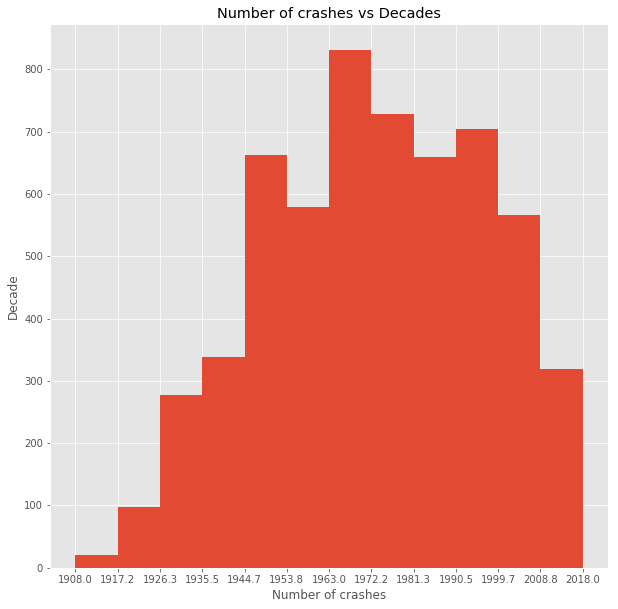

In [4]:
# 1 Decades with most no. of crashes
plane_info['year']=plane_info['date'].str.slice(-4)
plane_info['year']=plane_info['year'].astype('int')
count,bins=np.histogram(plane_info['year'],12)
plane_info['year'].plot(kind='hist',bins=12,figsize=(10,10),xticks=bins)
plt.title("Number of crashes vs Decades")
plt.xlabel("Number of crashes")
plt.ylabel("Decade")
plt.show()

Looks like 1944-1953, 1963-1972 and 1990-1999 are decades which saw too many crashes

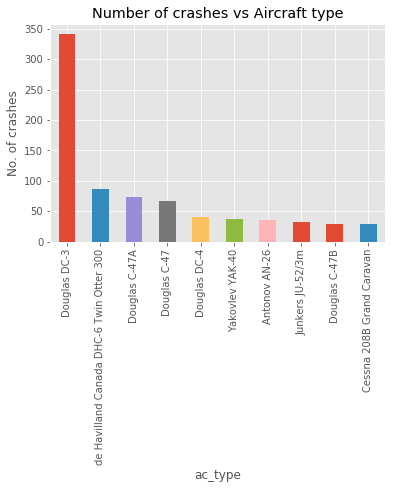

In [5]:
# 2 Which "ac_type" has the most no. of crashes
plane_info.groupby('ac_type')['ac_type'].agg('count').sort_values(ascending=False).head(10).plot('bar')
plt.title("Number of crashes vs Aircraft type")
plt.ylabel("No. of crashes")
plt.show()

Oh no! Just look at the numbers of Douglas DC-3. There are almost 350 recorded crashes of Douglas DC-3. I am never boarding this plane in my life.

In [6]:
# 3 Which operator has the most no. of crashes
plane_info.groupby('operator')['operator'].agg('count').sort_values(ascending=False).head(10)

operator
Aeroflot                               260
Military - U.S. Air Force              177
Air France                              72
Deutsche Lufthansa                      64
United Air Lines                        44
Military - U.S. Army Air Forces         43
China National Aviation Corporation     43
Pan American World Airways              41
American Airlines                       37
Military - Royal Air Force              36
Name: operator, dtype: int64

Aeroflot has the most number of crashes

In [7]:
# 4 Description of the plane which crashed with the most no. of passengers
plane_info['pass']=plane_info['aboard'].str.partition(' ')[0]
plane_info['pass'].replace('?','0',inplace=True)
plane_info['pass']=plane_info['pass'].astype(int,inplace=True)
plane=plane_info['pass'].sort_values(ascending=False).index
plane_info.iloc[plane[0]:plane[0]+1,:]

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary,year,pass
3164,"March 27, 1977",17:07,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,644 (passengers:614 crew:30),583 (passengers:560 crew:23),0,Both aircraft were diverted to Tenerife becaus...,1977,644


How can anyone forget the worst crash of the century which gives nightmares to all the pilots! Two Boeing 747s crashed on the runway resulting 650 deaths. 

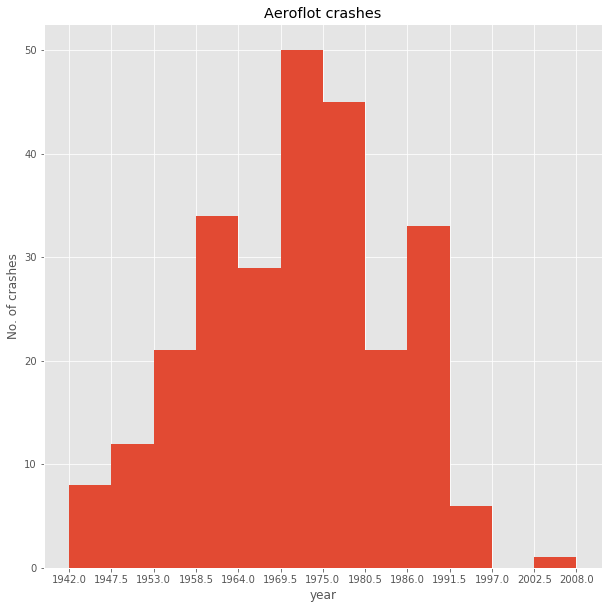

In [8]:
# 5 Histogram of the no. of crashes of the operator with the most no. of crashes
aeroflot=plane_info[plane_info['operator']=='Aeroflot']
count,bin_edges=np.histogram(aeroflot['year'],12)
aeroflot['year'].plot(kind='hist',bins=12,figsize=(10,10),xticks=bin_edges)
plt.title('Aeroflot crashes')
plt.xlabel('year')
plt.ylabel('No. of crashes')
plt.show()

# Thank You